In [1]:
import yt
import cPickle
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
import brewer2mpl as brew
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl
from emission_functions import *
from matplotlib.colorbar import Colorbar 

/Users/dalek/anaconda2/lib/python2.7/site-packages/yt/fields/local_fields.py:46: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  warnings.warn("Because 'sampling_type' not specified, yt will "


In [2]:
def get_refine_box(ds, zsnap, track):
    ## find closest output, modulo not updating before printout
    diff = track['col1'] - zsnap
    this_loc = track[np.where(diff == np.min(diff[np.where(diff > 1.e-6)]))]
    print "using this loc:", this_loc
    x_left = this_loc['col2'][0]
    y_left = this_loc['col3'][0]
    z_left = this_loc['col4'][0]
    x_right = this_loc['col5'][0]
    y_right = this_loc['col6'][0]
    z_right = this_loc['col7'][0]

    refine_box_center = [0.5*(x_left+x_right), 0.5*(y_left+y_right), 0.5*(z_left+z_right)]
    refine_box = ds.r[x_left:x_right, y_left:y_right, z_left:z_right]
    refine_width = np.abs(x_right - x_left)

    return refine_box, refine_box_center, refine_width


In [30]:
base = "/Users/dalek/data/Molly/nref11n_nref10f_refine200kpc_z4to2"
#base = "/Users/dalek/data/Molly/natural/nref11"
fn = base+"/RD0020/RD0020"
lines = ['HAlpha','OVI','CIV','CIII_977','SiIV']
track_name = base+"/halo_track"
args = fn.split('/')

bmap = brew.get_map('PuRd','Sequential',9)
pink_cmap = bmap.get_mpl_colormap(N=1000, gamma=2.0)

In [31]:
ds = yt.load(fn)
track = Table.read(track_name, format='ascii')
track.sort('col1')
rb,rb_center,rb_width = get_refine_box(ds,ds.current_redshift,track)
dx = np.unique(rb['dx']).max()
box_size = ds.arr(rb_width,'code_length').in_units('kpc')
box_size = np.ceil(box_size/2.)
bsL,bsR = -1*box_size.value,box_size.value

yt : [INFO     ] 2018-01-17 23:36:41,870 Parameters: current_time              = 154.801032717
yt : [INFO     ] 2018-01-17 23:36:41,872 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-01-17 23:36:41,874 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2018-01-17 23:36:41,877 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2018-01-17 23:36:41,878 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-01-17 23:36:41,889 Parameters: current_redshift          = 1.99999968795
yt : [INFO     ] 2018-01-17 23:36:41,890 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-01-17 23:36:41,891 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-01-17 23:36:41,892 Parameters: hubble_constant           = 0.695


using this loc:      col1       col2     col3     col4     col5     col6     col7   col8
------------- -------- -------- -------- -------- -------- -------- ----
2.04999996364 0.493091 0.488119 0.501099 0.495091 0.490119 0.503099   10


Parsing Hierarchy : 100%|██████████| 4574/4574 [00:01<00:00, 2330.28it/s] 
yt : [INFO     ] 2018-01-17 23:36:44,690 Gathering a field list (this may take a moment.)


In [5]:
field = 'Emission_HAlpha'
index = 'x'
filein = 'frbs/frb'+index+'_'+args[-3]+'_'+args[-2]+'_'+field+'_forcedres.cpkl'
frb = cPickle.load(open(filein,'rb'))

filein = 'frbs/frb'+index+'_'+args[-3]+'_'+args[-2]+'_'+field+'_10kpc.cpkl'
frb2 = cPickle.load(open(filein,'rb'))

/Users/dalek/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


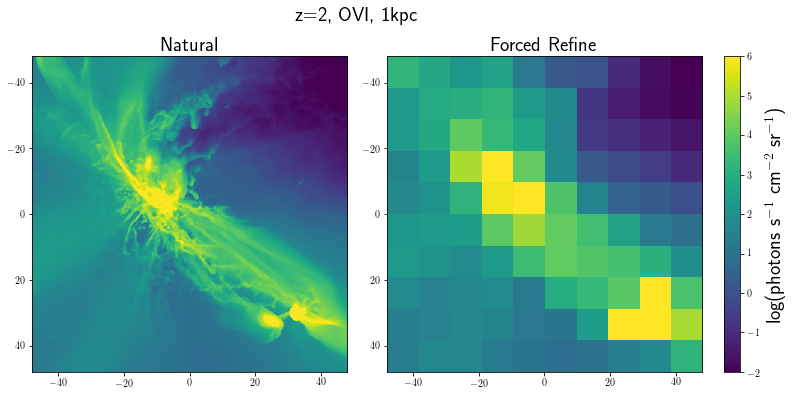

In [6]:
fontrc ={'fontname':'Helvetica','fontsize':20}
mpl.rc('text', usetex=True)

fig,ax = plt.subplots(1,2)#,sharex=True,sharey=True)
fig.set_size_inches(10,6)
im = ax[0].imshow(np.log10(frb),extent=(bsL,bsR,bsR,bsL),vmin=-2,vmax=6,
                           interpolation='none',cmap='viridis',origin='lower')
im2 = ax[1].imshow(np.log10(frb2),extent=(bsL,bsR,bsR,bsL),vmin=-2,vmax=6,
                           interpolation='none',cmap='viridis',origin='lower')
#fig.colorbar(im2)

#fig.subplots_adjust(left=0.15)
#cbar_ax = fig.add_axes([0.001, 0.1, 0.02, 0.5])

axins = inset_axes(ax[1],
                   width="5%",  # width = 10% of parent_bbox width
                   height="100%",  # height : 50%
                   loc=3,
                   bbox_to_anchor=(1.07, 0.0, 1, 1),
                   bbox_transform=ax[1].transAxes,
                   borderpad=0,
                   )

ax[0].set_title('Natural',**fontrc)
ax[1].set_title('Forced Refine',**fontrc)
cb = fig.colorbar(im2, cax=axins,label=r'log(photons s$^{-1}$ cm$^{-2}$ sr$^{-1}$)')
axcb = cb.ax
text = axcb.yaxis.label
font = mpl.font_manager.FontProperties(family='times new roman', style='italic', size=20)
text.set_font_properties(font)

fig.suptitle('z=2, OVI, 1kpc',**fontrc)

plt.tight_layout()
plt.show()

In [ ]:
dens_HA = yt.ProjectionPlot(ds,'x','H_nuclei_density',weight_field=('gas','Emission_HAlpha'),
                            center=rb_center,width=(100.,'kpc'),data_source=rb)
dens_HA.show()

In [ ]:
dens_HA = yt.ProjectionPlot(ds,'x','H_nuclei_density',weight_field=('gas','Emission_OVI'),
                            center=rb_center,width=(100.,'kpc'),data_source=rb)
dens_HA.show()

In [ ]:
frb = cPickle.load(open('frbx_nref11_RD0020_temp_Emission_OVI_forcedres.cpkl','rb'))

In [ ]:
plt.imshow(np.log10(frb),vmin=3.5,vmax=6.5)
plt.colorbar()
plt.show()

### Testing out physical distribution maps

In [39]:
filetrue = "frbs/frbx_nref11n_nref10f_refine200kpc_z4to2_RD0020_temp_Whden_forcedres.cpkl"
filenat  = "frbs/frbx_nref11_RD0020_temp_Emission_OVI_1kpc.cpkl"
fileref  = "frbs/frbx_nref11n_nref10f_refine200kpc_z4to2_RD0020_temp_Emission_OVI_1kpc.cpkl"

frbTRU = cPickle.load(open(filetrue,'rb'))
frbNAT = cPickle.load(open(filenat,'rb'))
frbREF = cPickle.load(open(fileref,'rb'))


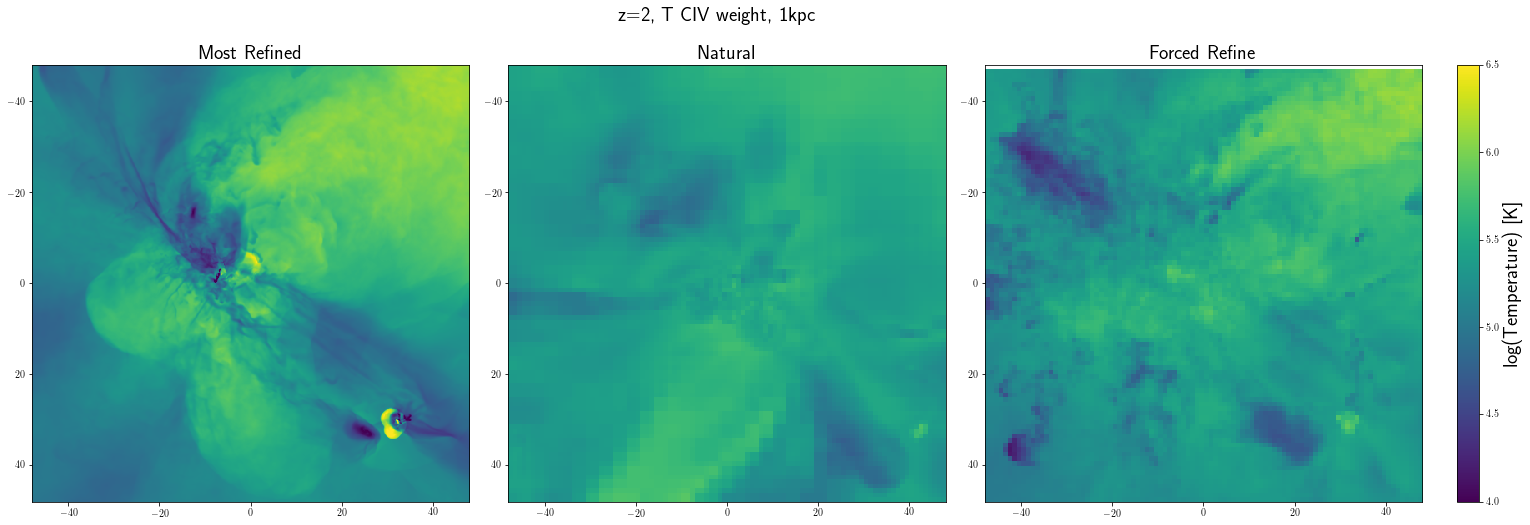

In [40]:
fontrc ={'fontname':'Helvetica','fontsize':20}
mpl.rc('text', usetex=True)

fig,ax = plt.subplots(1,3)#,sharex=True,sharey=True)
fig.set_size_inches(20,8)
im = ax[0].imshow(np.log10(frbTRU),extent=(bsL,bsR,bsR,bsL),vmin=4.0,vmax=6.5,
                           interpolation='none',cmap='viridis',origin='lower')
im2 = ax[1].imshow(np.log10(frbNAT),extent=(bsL,bsR,bsR,bsL),vmin=4.0,vmax=6.5,
                           interpolation='none',cmap='viridis',origin='lower')
im3 = ax[2].imshow(np.log10(frbREF),extent=(bsL,bsR,bsR,bsL),vmin=4.0,vmax=6.5,
                           interpolation='none',cmap='viridis',origin='lower')

axins = inset_axes(ax[2],
                   width="5%",  # width = 10% of parent_bbox width
                   height="100%",  # height : 50%
                   loc=3,
                   bbox_to_anchor=(2.17, 0.0, 1, 1),
                   bbox_transform=ax[1].transAxes,
                   borderpad=0,
                   )

ax[0].set_title('Most Refined',**fontrc)
ax[1].set_title('Natural',**fontrc)
ax[2].set_title('Forced Refine',**fontrc)
cb = fig.colorbar(im3, cax=axins,label=r'log(Temperature) [K]')
axcb = cb.ax
text = axcb.yaxis.label
font = mpl.font_manager.FontProperties(family='times new roman', style='italic', size=20)
text.set_font_properties(font)

fig.suptitle('z=2, T CIV weight, 1kpc',**fontrc)

plt.tight_layout()
plt.show()

In [45]:
filetrue = "frbs/frbx_nref11n_nref10f_refine200kpc_z4to2_RD0020_temp_Whden_forcedres.cpkl"
filenat  = "frbs/frbx_nref11_RD0020_temp_Emission_CIII_977_1kpc.cpkl"
fileref  = "frbs/frbx_nref11n_nref10f_refine200kpc_z4to2_RD0020_temp_Emission_CIII_977_1kpc.cpkl"

frbTRU = cPickle.load(open(filetrue,'rb'))
frbNAT = cPickle.load(open(filenat,'rb'))
frbREF = cPickle.load(open(fileref,'rb'))


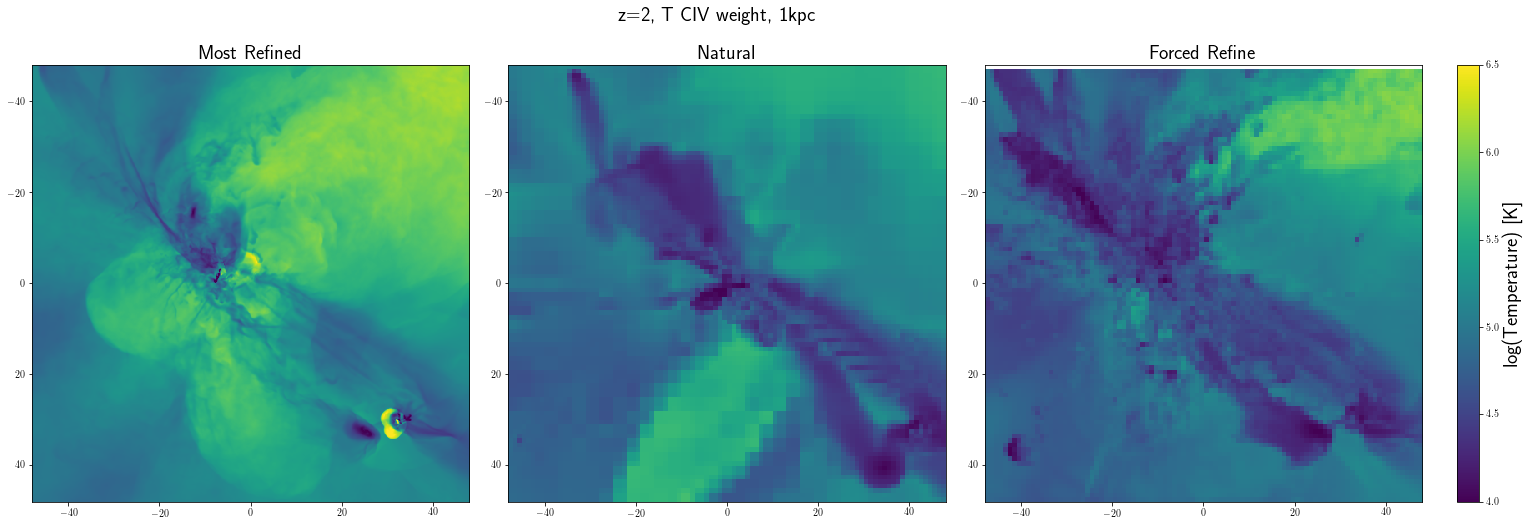

In [46]:
fontrc ={'fontname':'Helvetica','fontsize':20}
mpl.rc('text', usetex=True)

fig,ax = plt.subplots(1,3)#,sharex=True,sharey=True)
fig.set_size_inches(20,8)
im = ax[0].imshow(np.log10(frbTRU),extent=(bsL,bsR,bsR,bsL),vmin=4.,vmax=6.5,
                           interpolation='none',cmap='viridis',origin='lower')
im2 = ax[1].imshow(np.log10(frbNAT),extent=(bsL,bsR,bsR,bsL),vmin=4.,vmax=6.5,
                           interpolation='none',cmap='viridis',origin='lower')
im3 = ax[2].imshow(np.log10(frbREF),extent=(bsL,bsR,bsR,bsL),vmin=4.,vmax=6.5,
                           interpolation='none',cmap='viridis',origin='lower')

axins = inset_axes(ax[2],
                   width="5%",  # width = 10% of parent_bbox width
                   height="100%",  # height : 50%
                   loc=3,
                   bbox_to_anchor=(2.17, 0.0, 1, 1),
                   bbox_transform=ax[1].transAxes,
                   borderpad=0,
                   )

ax[0].set_title('Most Refined',**fontrc)
ax[1].set_title('Natural',**fontrc)
ax[2].set_title('Forced Refine',**fontrc)
cb = fig.colorbar(im3, cax=axins,label=r'log(Temperature) [K]')
axcb = cb.ax
text = axcb.yaxis.label
font = mpl.font_manager.FontProperties(family='times new roman', style='italic', size=20)
text.set_font_properties(font)

fig.suptitle('z=2, T CIV weight, 1kpc',**fontrc)

plt.tight_layout()
plt.show()

In [20]:
num_cells = 20.
index = 'x'

obj = ds.proj('H_nuclei_density',index,data_source=rb,weight_field='H_nuclei_density')
frb = obj.to_frb((rb_width,'code_length'),(num_cells,num_cells),center=rb_center)
hden_weight = np.log10(frb['H_nuclei_density'])

obj = ds.proj('Emission_CIV',index,data_source=rb)
frb = obj.to_frb((rb_width,'code_length'),(num_cells,num_cells),center=rb_center)
emisCIV = np.log10(frb['Emission_CIV'])

obj = ds.proj('H_nuclei_density',index,data_source=rb)
frb = obj.to_frb((rb_width,'code_length'),(num_cells,num_cells),center=rb_center)
hden_solo = np.log10(frb['H_nuclei_density'])

yt : [INFO     ] 2018-01-16 15:57:43,871 Projection completed
yt : [INFO     ] 2018-01-16 15:57:43,873 Making a fixed resolution buffer of (H_nuclei_density) 20 by 20
yt : [INFO     ] 2018-01-16 16:01:17,204 Projection completed
yt : [INFO     ] 2018-01-16 16:01:17,206 Making a fixed resolution buffer of (Emission_CIV) 20 by 20
yt : [INFO     ] 2018-01-16 16:02:00,547 Projection completed
yt : [INFO     ] 2018-01-16 16:02:00,549 Making a fixed resolution buffer of (H_nuclei_density) 20 by 20


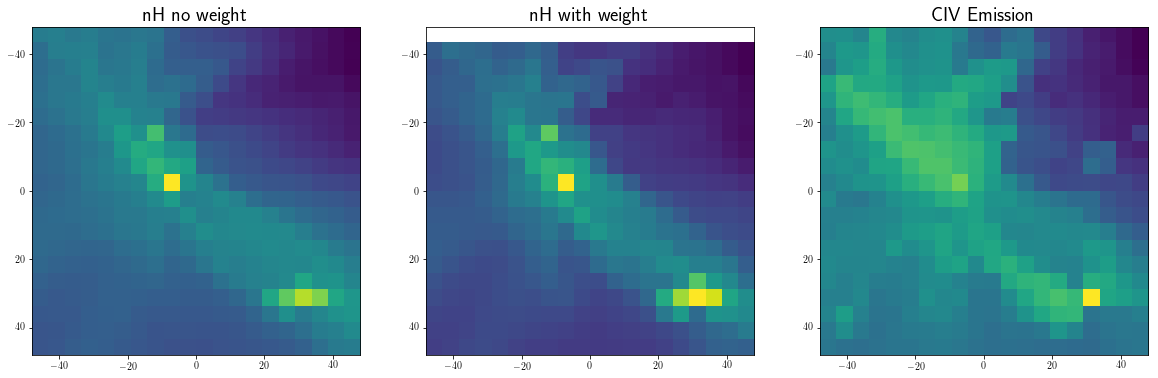

In [21]:
fontrc ={'fontname':'Helvetica','fontsize':20}
mpl.rc('text', usetex=True)

fig,ax = plt.subplots(1,3)#,sharex=True,sharey=True)
fig.set_size_inches(20,8)
im = ax[0].imshow(hden_solo,extent=(bsL,bsR,bsR,bsL),#vmin=-6.,vmax=-1.,
                           interpolation='none',cmap='viridis',origin='lower')
im2 = ax[1].imshow(hden_weight,extent=(bsL,bsR,bsR,bsL),#vmin=-6.,vmax=-1.,
                           interpolation='none',cmap='viridis',origin='lower')
im3 = ax[2].imshow(emisCIV,extent=(bsL,bsR,bsR,bsL),#vmin=-6.,vmax=-1.,
                           interpolation='none',cmap='viridis',origin='lower')

ax[0].set_title('nH no weight',**fontrc)
ax[1].set_title('nH with weight',**fontrc)
ax[2].set_title('CIV Emission',**fontrc)

plt.show()

In [26]:
num_cells = 10.
index = 'x'

obj = ds.proj('temperature',index,data_source=rb,weight_field='H_nuclei_density')
frb = obj.to_frb((rb_width*0.99,'code_length'),(num_cells,num_cells),center=rb_center)
temp_weight = np.log10(frb['temperature'])

obj = ds.proj('temperature',index,data_source=rb)
frb = obj.to_frb((rb_width*0.99,'code_length'),(num_cells,num_cells),center=rb_center)
temp_solo = np.log10(frb['temperature'])

yt : [INFO     ] 2018-01-16 16:41:04,359 Projection completed
yt : [INFO     ] 2018-01-16 16:41:04,361 Making a fixed resolution buffer of (temperature) 10 by 10
yt : [INFO     ] 2018-01-16 16:41:28,905 Projection completed
yt : [INFO     ] 2018-01-16 16:41:28,907 Making a fixed resolution buffer of (temperature) 10 by 10


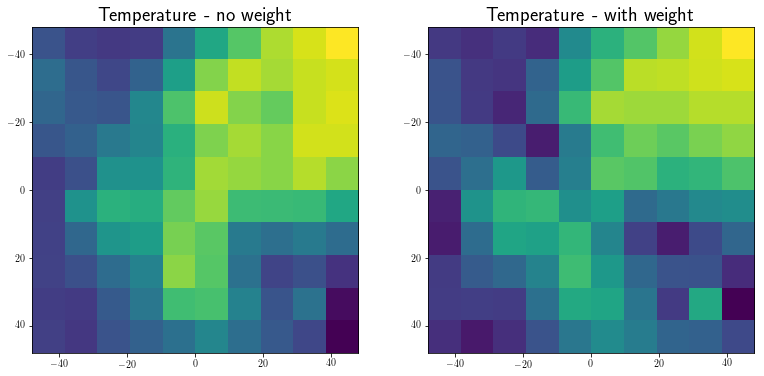

In [27]:
fontrc ={'fontname':'Helvetica','fontsize':20}
mpl.rc('text', usetex=True)

fig,ax = plt.subplots(1,2)#,sharex=True,sharey=True)
fig.set_size_inches(13,6)
im = ax[0].imshow(temp_solo,extent=(bsL,bsR,bsR,bsL),#vmin=-6.,vmax=-1.,
                           interpolation='none',cmap='viridis',origin='lower')
im2 = ax[1].imshow(temp_weight,extent=(bsL,bsR,bsR,bsL),#vmin=-6.,vmax=-1.,
                           interpolation='none',cmap='viridis',origin='lower')

ax[0].set_title('Temperature - no weight',**fontrc)
ax[1].set_title('Temperature - with weight',**fontrc)

plt.show()

yt : [INFO     ] 2018-01-05 18:45:26,847 Projection completed
yt : [INFO     ] 2018-01-05 18:45:26,848 xlim = 0.487924 0.489924
yt : [INFO     ] 2018-01-05 18:45:26,848 ylim = 0.501169 0.503169
yt : [INFO     ] 2018-01-05 18:45:26,850 xlim = 0.487924 0.489924
yt : [INFO     ] 2018-01-05 18:45:26,851 ylim = 0.501169 0.503169
yt : [INFO     ] 2018-01-05 18:45:26,853 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800



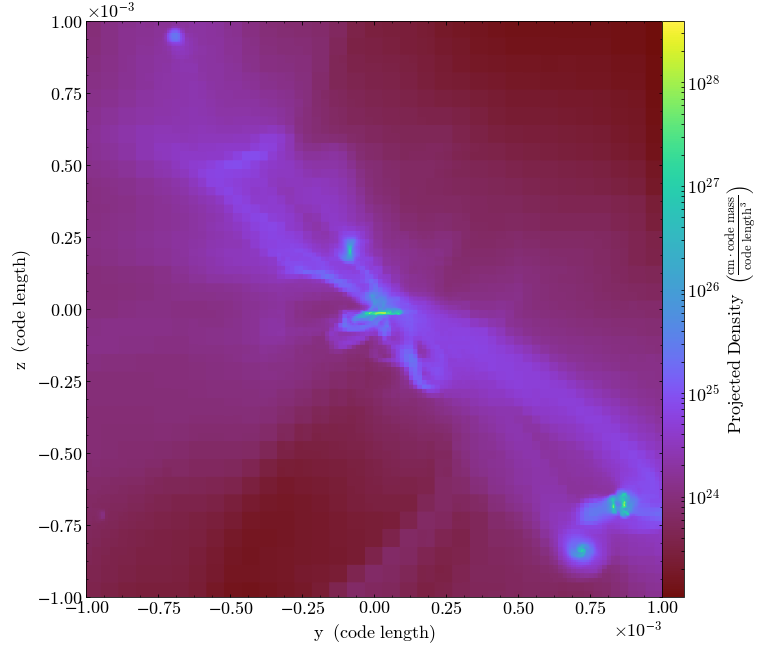

In [9]:
proj = yt.ProjectionPlot(ds,'x','Density',center=rb_center,data_source=rb,
                         width=(rb_width,'code_length'))
proj.show()

In [22]:
num_cells = 20.
index = 'x'

rbw = ds.arr(rb_width,'code_length').in_units('kpc')
dx = rbw/num_cells
rbw = rbw - dx
num_cells = 19.

obj = ds.proj('temperature',index,weight_field='H_nuclei_density',data_source=rb)
frb = obj.to_frb((rbw,'kpc'),(num_cells,num_cells),center=rb_center)
temp_weight = np.log10(frb['temperature'])

obj = ds.proj('temperature',index)
frb = obj.to_frb((rb_width,'code_length'),(num_cells,num_cells),center=rb_center)
temp_solo = np.log10(frb['temperature'])

yt : [INFO     ] 2018-01-05 18:58:54,312 Projection completed
yt : [INFO     ] 2018-01-05 18:58:54,314 Making a fixed resolution buffer of (temperature) 19 by 19
yt : [INFO     ] 2018-01-05 18:59:21,019 Projection completed
yt : [INFO     ] 2018-01-05 18:59:21,022 Making a fixed resolution buffer of (temperature) 19 by 19


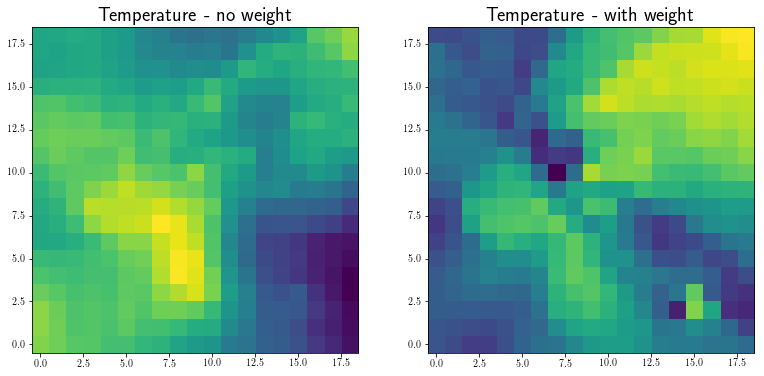

In [23]:
fontrc ={'fontname':'Helvetica','fontsize':20}
mpl.rc('text', usetex=True)

fig,ax = plt.subplots(1,2)#,sharex=True,sharey=True)
fig.set_size_inches(13,6)
im = ax[0].imshow(temp_solo,#vmin=-6.,vmax=-1.,
                           interpolation='none',cmap='viridis',origin='lower')
im2 = ax[1].imshow(temp_weight,#vmin=-6.,vmax=-1.,
                           interpolation='none',cmap='viridis',origin='lower')

ax[0].set_title('Temperature - no weight',**fontrc)
ax[1].set_title('Temperature - with weight',**fontrc)

plt.show()

### Trying to recreate this box issue with the natural run

In [13]:
base = "/Users/dalek/data/Molly/nref11n_nref10f_refine200kpc_z4to2"
base2 = "/Users/dalek/data/Molly/natural/nref11"
fn = base2+"/RD0020/RD0020"
lines = ['HAlpha','OVI','CIV','CIII_977','SiIV']
track_name = base+"/halo_track"
args = fn.split('/')

ds = yt.load(fn)
track = Table.read(track_name, format='ascii')
track.sort('col1')
rb,rb_center,rb_width = get_refine_box(ds,ds.current_redshift,track)
dx = np.unique(rb['dx']).max()
box_size = ds.arr(rb_width,'code_length').in_units('kpc')
box_size = np.ceil(box_size/2.)
bsL,bsR = -1*box_size.value,box_size.value

yt : [INFO     ] 2018-01-16 15:55:30,359 Parameters: current_time              = 154.801187733
yt : [INFO     ] 2018-01-16 15:55:30,359 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-01-16 15:55:30,360 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2018-01-16 15:55:30,363 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2018-01-16 15:55:30,365 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-01-16 15:55:30,366 Parameters: current_redshift          = 1.99999762534
yt : [INFO     ] 2018-01-16 15:55:30,367 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-01-16 15:55:30,368 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-01-16 15:55:30,369 Parameters: hubble_constant           = 0.695


using this loc:      col1       col2     col3     col4     col5     col6     col7   col8
------------- -------- -------- -------- -------- -------- -------- ----
1.99999996364 0.493032 0.487924 0.501169 0.495032 0.489924 0.503169   10


Parsing Hierarchy : 100%|██████████| 1449/1449 [00:00<00:00, 23770.87it/s]
yt : [INFO     ] 2018-01-16 15:55:30,693 Gathering a field list (this may take a moment.)


In [14]:
num_cells = 20.
index = 'x'

obj = ds.proj('temperature',index,data_source=rb,weight_field='H_nuclei_density')
frb = obj.to_frb((rb_width,'code_length'),(num_cells,num_cells),center=rb_center)
temp_weight = np.log10(frb['temperature'])

obj = ds.proj('temperature',index,data_source=rb)
frb = obj.to_frb((rb_width,'code_length'),(num_cells,num_cells),center=rb_center)
temp_solo = np.log10(frb['temperature'])

yt : [INFO     ] 2018-01-16 15:55:35,275 Projection completed
yt : [INFO     ] 2018-01-16 15:55:35,276 Making a fixed resolution buffer of (temperature) 20 by 20
yt : [INFO     ] 2018-01-16 15:55:35,415 Projection completed
yt : [INFO     ] 2018-01-16 15:55:35,417 Making a fixed resolution buffer of (temperature) 20 by 20


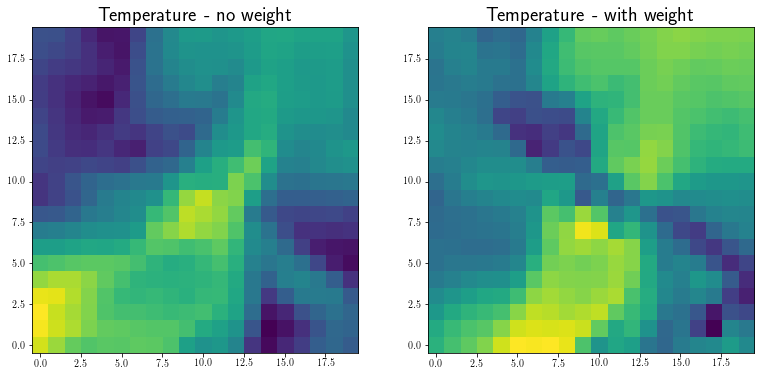

In [15]:
fontrc ={'fontname':'Helvetica','fontsize':20}
mpl.rc('text', usetex=True)

fig,ax = plt.subplots(1,2)#,sharex=True,sharey=True)
fig.set_size_inches(13,6)
im = ax[0].imshow(temp_solo,#vmin=-6.,vmax=-1.,
                           interpolation='none',cmap='viridis',origin='lower')
im2 = ax[1].imshow(temp_weight,#vmin=-6.,vmax=-1.,
                           interpolation='none',cmap='viridis',origin='lower')

ax[0].set_title('Temperature - no weight',**fontrc)
ax[1].set_title('Temperature - with weight',**fontrc)

plt.show()

### Adding histograms to the phase diagram

If I want to color the phase diagram by emission probability, it would maybe be good to show the histograms of the T and hden since that number information is lost.

This is going to be an annoying exercise in using gridspec. Woo!

In [8]:
index,RD,resolution,line = 'x','RD0016','forcedres','CIII_977'
base = '_nref11n_nref10f_refine200kpc_z4to2_'
redshift = 3.

In [108]:
hden_file = '/Users/dalek/repos/BmoreCGM/frbs/frb'+index+base+RD+'_hden_Emission_'+line+'_'+resolution+'.cpkl'
temp_file = '/Users/dalek/repos/BmoreCGM/frbs/frb'+index+base+RD+'_temp_Emission_'+line+'_'+resolution+'.cpkl'
emis_file = '/Users/dalek/repos/BmoreCGM/frbs/frb'+index+base+RD+'_Emission_'+line+'_'+resolution+'.cpkl'

hden = cPickle.load(open(hden_file,'rb'))
temp = cPickle.load(open(temp_file,'rb'))
emis = cPickle.load(open(emis_file,'rb'))
emis = emis/(1.+redshift)**4.0

hden,temp,emis = np.log10(hden.flat),np.log10(temp.flat),np.log10(emis.flat)
hist, xedges, yedges  = np.histogram2d(hden,temp,range=[[-6,1],[3.5, 6.5]],bins=120)

id1 = np.argwhere(np.isnan(hden))
id2 = np.argwhere(np.isnan(temp))

hden = np.delete(hden, id1)
temp = np.delete(temp, id2)
emis = np.delete(emis, id1)

idN = np.where(emis < 1.)[0]
idP = np.where((emis >= 1.) & (emis < 2.))[0]
idB = np.where((emis >= 2.) & (emis < 3.))[0]
idG = np.where((emis >= 3.))[0]

/Users/dalek/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log10


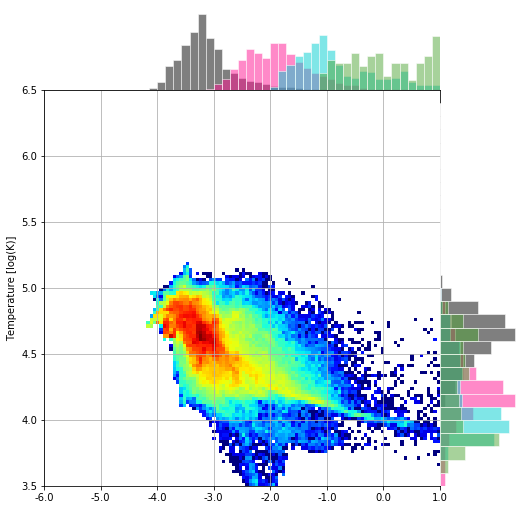

In [112]:
fig = plt.figure(1, figsize=(9,8))

gs = gridspec.GridSpec(3,3, height_ratios=[0.2,1,0.05], width_ratios=[1,0.2,0.2])
gs.update(left=0.075, right=0.93, bottom=0.09, top=0.95, wspace=0.00, hspace=0.00)

# --------------------------------------------------------
ax1 = plt.subplot(gs[1,0]) # place it where it should be.
# --------------------------------------------------------

plt1 = ax1.imshow(np.log10(hist.T),extent=[-6,1,3.5,6.5],
                  interpolation='nearest',origin='lower',cmap='jet')

ax1.grid(True)
ax1.set_xlim([-6,1])
ax1.set_ylim([3.5,6.5])
ax1.set_xlabel(r' ') # Force this empty !
ax1.set_xticks(np.linspace(-6,1,8)) # Force this to what I want - for consistency with histogram below !
ax1.set_xticklabels(np.linspace(-6,1,8)) # Force this empty !
ax1.set_ylabel(r'Temperature [log(K)]')
x0,x1 = ax1.get_xlim()
y0,y1 = ax1.get_ylim()
ax1.set_aspect((x1-x0)/(y1-y0))


# --------------------------------------------------------
#cbax = plt.subplot(gs[2,0]) # Place it where it should be.
# --------------------------------------------------------
#cb = Colorbar(ax = cbax, mappable = plt1, orientation = 'horizontal', ticklocation = 'bottom')
#cb.set_label(r'Colorbar !', labelpad=5)
#cbax.subplots_adjust(top=0.9)

# --------------------------------------------------------
ax1v = plt.subplot(gs[1,1])
# --------------------------------------------------------

bins = np.arange(3.5,6.5,0.1)
ax1v.hist(temp[idN],bins=bins, orientation='horizontal', color='k', edgecolor='w',alpha=0.5,normed=True)
ax1v.hist(temp[idP],bins=bins, orientation='horizontal', color='DeepPink', edgecolor='w',alpha=0.5,normed=True)
ax1v.hist(temp[idB],bins=bins, orientation='horizontal', color='DarkTurquoise', edgecolor='w',alpha=0.5,normed=True)
ax1v.hist(temp[idG],bins=bins, orientation='horizontal', color='#50A638', edgecolor='w',alpha=0.5,normed=True)


ax1v.set_yticks(np.linspace(3.5,6.5,7)) 
ax1v.set_xticklabels([])
ax1v.set_yticklabels([])
ax1v.set_ylim([3.5,6.5])
ax1v.set_axis_off()


# --------------------------------------------------------
ax1h = plt.subplot(gs[0,0])
# --------------------------------------------------------

bins = np.linspace(-6,1,50)
#ax1h.hist(hden, bins=bins, orientation='vertical', color='k', edgecolor='w',alpha=0.5,normed=True)
ax1h.hist(hden[idN],bins=bins, orientation='vertical', color='k', edgecolor='w',alpha=0.5,normed=True)
ax1h.hist(hden[idP],bins=bins, orientation='vertical', color='DeepPink', edgecolor='w',alpha=0.5,normed=True)
ax1h.hist(hden[idB],bins=bins, orientation='vertical', color='DarkTurquoise', edgecolor='w',alpha=0.5,normed=True)
ax1h.hist(hden[idG],bins=bins, orientation='vertical', color='#50A638', edgecolor='w',alpha=0.5,normed=True)
ax1h.set_xticks([]) # Ensures we have the same ticks as the scatter plot !
ax1h.set_yticklabels([])
ax1h.set_xlim([-6,1])
ax1h.set_axis_off()

plt.show()

In [99]:
plt.close()

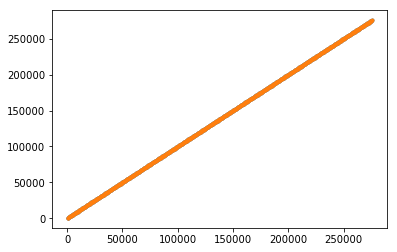

In [104]:
plt.plot(id1,id2,'.')
plt.show()

True